In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/Bai Tap 1/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **MISSING VALUE**

In [4]:
#kiểm tra phần trăm missing value của data
round(data.isnull().sum()/len(data),5).sort_values(ascending = False)

Cabin          0.77104
Age            0.19865
Embarked       0.00224
PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
SibSp          0.00000
Parch          0.00000
Ticket         0.00000
Fare           0.00000
dtype: float64

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


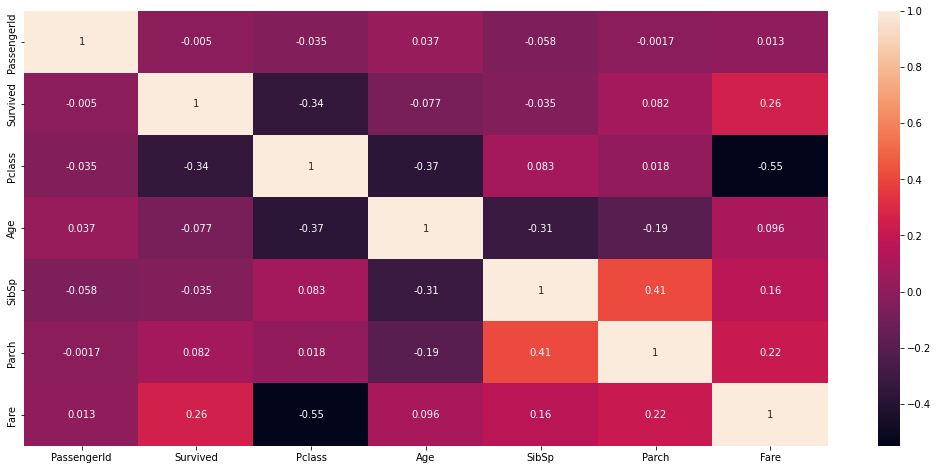

In [ ]:
#kiểm tra độ tương quan của các cột với nhau.
plt.figure(figsize = (18, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#vì cột cabin có missing value chiếm 77% nên ta có thể bỏ cột cabin đi. các cột name và ticket không cần thiết cho quá trình phân tích và ML nên ta bỏ đi.
data.drop(columns= {'Cabin', 'Name','Ticket', 'PassengerID'}, axis = 1, inplace = True)

In [8]:
#đối với missing value của cột age ta có thể thay thế bằng giá trị mean(), còn cột embarked thì thay thế bằng mod() vì cột embarked là object nên không dùng mean()
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# **LABEL ENCODING**

In [10]:
binary_cols = [col for col in data.columns if data[col].dtype not in ["int64", "float64"]
               and data[col].nunique() == 2]

In [11]:
print(binary_cols)

['Sex']


In [12]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
for col in binary_cols:
    data = label_encoder(data, col)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


# **ONEHOT ENCODING**


In [13]:
cate_col = [col for col in data.columns if 10 >= data[col].nunique() > 2]

In [14]:
print(cate_col)

['Pclass', 'SibSp', 'Parch', 'Embarked']


In [16]:
def one_hot_encode_df(df, columns_to_encode):
    encoder = OneHotEncoder()
    one_hot_dfs = []
    for column in columns_to_encode:
        one_hot = encoder.fit_transform(df[[column]])
        one_hot = one_hot.toarray()
        column_names = encoder.get_feature_names_out([column])
        one_hot_df = pd.DataFrame(one_hot, columns=column_names)
        one_hot_dfs.append(one_hot_df)
        
    one_hot_df = pd.concat(one_hot_dfs, axis=1)
    df = pd.concat([df, one_hot_df], axis=1)
    df = df.drop(columns_to_encode, axis=1)
    
    return df

data = one_hot_encode_df(data, [col for col in data.columns if 10 >= data[col].nunique() > 2])
print(data)

     PassengerId  Survived  Sex        Age     Fare  Pclass_1  Pclass_2  \
0              1         0    1  22.000000   7.2500       0.0       0.0   
1              2         1    0  38.000000  71.2833       1.0       0.0   
2              3         1    0  26.000000   7.9250       0.0       0.0   
3              4         1    0  35.000000  53.1000       1.0       0.0   
4              5         0    1  35.000000   8.0500       0.0       0.0   
..           ...       ...  ...        ...      ...       ...       ...   
886          887         0    1  27.000000  13.0000       0.0       1.0   
887          888         1    0  19.000000  30.0000       1.0       0.0   
888          889         0    0  29.699118  23.4500       0.0       0.0   
889          890         1    1  26.000000  30.0000       1.0       0.0   
890          891         0    1  32.000000   7.7500       0.0       0.0   

     Pclass_3  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1.0      0.0 

#**CHECK AND REMOVE OUTLIERS**

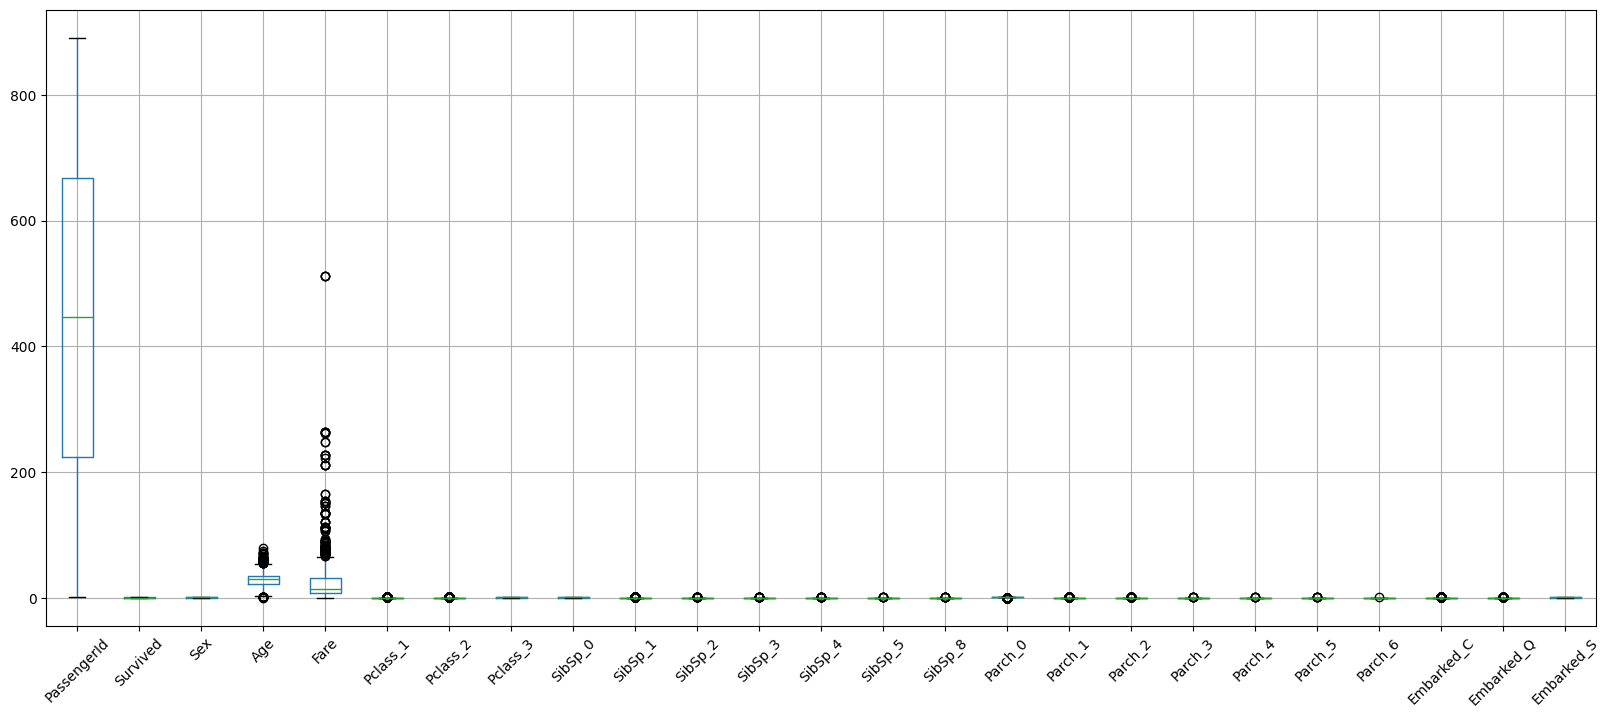

In [18]:
# Vẽ biểu đồ boxplot thể hiện các cột chứa các outliers
plt.figure(figsize=(20,8))
data.boxplot()
plt.xticks(rotation=45)
print()

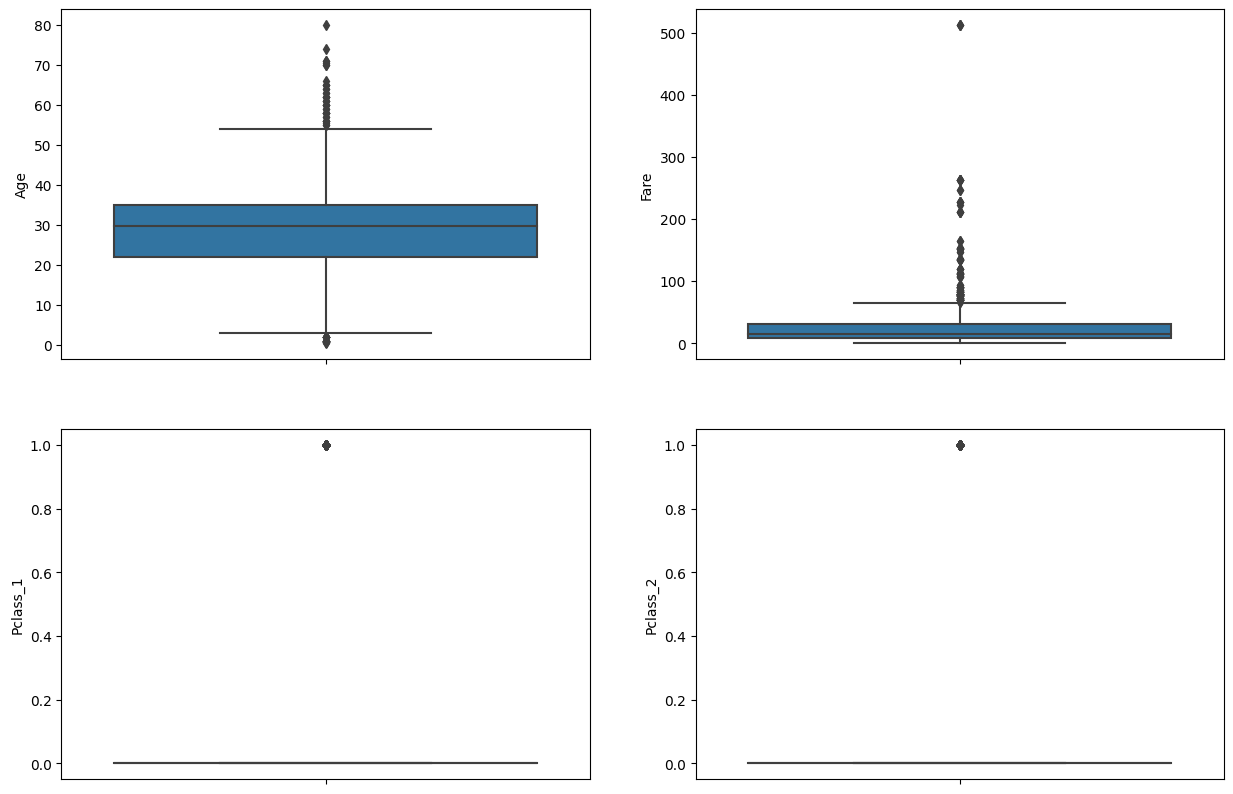

In [32]:
# Vẽ biểu đồ boxplot của từng biến 
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10), sharex=True)
sns.boxplot(y=data["Age"],ax=axs[0][0])
sns.boxplot(y=data["Fare"],ax=axs[0][1])
sns.boxplot(y=data["Pclass_1"],ax=axs[1][0])
sns.boxplot(y=data["Pclass_2"],ax=axs[1][1])
plt.show()

In [33]:
lower = 0.25
higher = 0.75
outlier_columns = ['Age', 'Fare']
for column in outlier_columns:     
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[data[column] >= lower] 
    data = data[data[column] <=upper] 

# **BALANCE & SCALE**

In [34]:
data.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.000000,7.2500,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0,26.000000,7.9250,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0,35.000000,53.1000,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,1,35.000000,8.0500,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,1,29.699118,8.4583,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


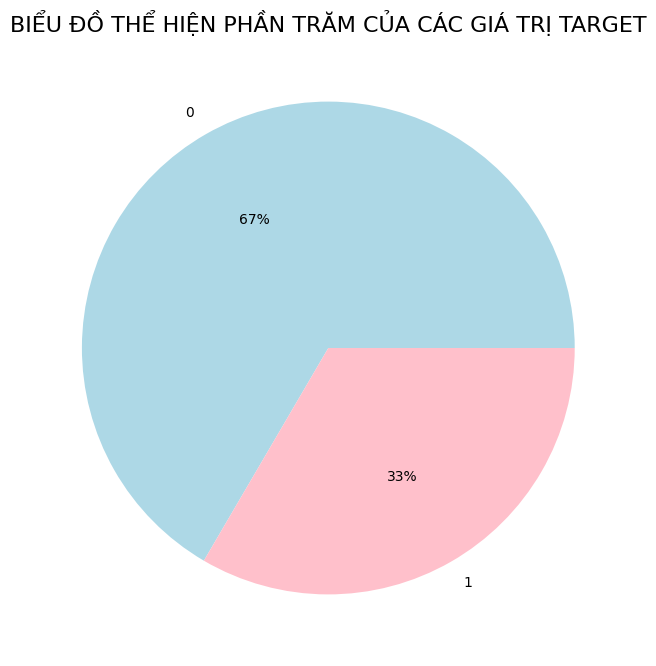

In [36]:
plt.figure(figsize = (16,8))
plt.title('Biểu đồ thể hiện phần trăm của các giá trị target'.upper(), fontsize = 16)
plt.pie(data['Survived'].value_counts(),labels=data['Survived'].unique(), autopct = '%.f%%', colors = {'lightblue', 'pink'})
plt.show()
#data đang bị imbalance nên cần balance lại data

In [37]:
y = data["Survived"]
X = data.drop(['Survived'], axis=1)

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8)
X_resampled, y_resampled = smote.fit_resample(X, y)

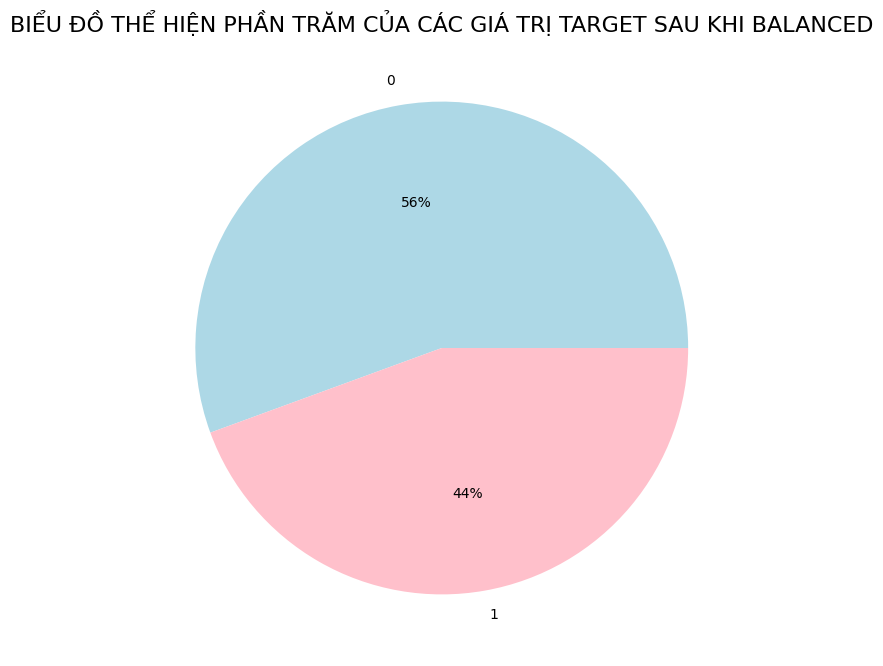

In [39]:
plt.figure(figsize = (16,8))
plt.title('Biểu đồ thể hiện phần trăm của các giá trị target sau khi balanced'.upper(), fontsize = 16)
plt.pie(y_resampled.value_counts(),labels=y_resampled.unique(), autopct = '%.f%%', colors = {'lightblue', 'pink'})
plt.show()
#target sau khi đã balanced

In [43]:
X_resampled.head()

,PassengerId,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,1,22.000000,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,0,26.000000,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,0,35.000000,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,1,35.000000,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,1,29.699118,8.4583,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
scaler    = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(X_resampled[['Age', 'Fare']]),
                         columns = ['age_norm', 'fare_norm'])

data_norm = pd.concat([data_norm, X_resampled], axis = 1, ignore_index = False)
print(data_norm.head())

   age_norm  fare_norm  PassengerId  Sex        Age     Fare  Pclass_1  \
0 -0.635325  -0.790109            1    1  22.000000   7.2500       0.0   
1 -0.230657  -0.739982            3    0  26.000000   7.9250       0.0   
2  0.679845   2.614768            4    0  35.000000  53.1000       1.0   
3  0.679845  -0.730700            5    1  35.000000   8.0500       0.0   
4  0.143571  -0.700379            6    1  29.699118   8.4583       0.0   

   Pclass_2  Pclass_3  SibSp_0  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0       0.0       1.0      0.0  ...      1.0      0.0      0.0      0.0   
1       0.0       1.0      1.0  ...      1.0      0.0      0.0      0.0   
2       0.0       0.0      0.0  ...      1.0      0.0      0.0      0.0   
3       0.0       1.0      1.0  ...      1.0      0.0      0.0      0.0   
4       0.0       1.0      1.0  ...      1.0      0.0      0.0      0.0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0      0.0      0.0      0.0         

In [45]:
data_norm.drop(columns = {'Age', 'Fare'}, axis = 1, inplace = True)
data_norm.head()

,age_norm,fare_norm,PassengerId,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.635325,-0.790109,1,1,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.230657,-0.739982,3,0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.679845,2.614768,4,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.679845,-0.730700,5,1,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.143571,-0.700379,6,1,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_norm.head()

,age_norm,fare_norm,PassengerId,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,1,0,1,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.638789,0.786845,2,1,0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.284663,-0.488854,3,1,0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.407926,0.420730,4,1,0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.407926,-0.486337,5,0,1,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
